# Practice Loading and Exploring Datasets

This assignment is purposely open-ended. You will be asked to load datasets from the [UC-Irvine Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php). 

Even though you maybe using different datasets than your fellow classmates, try and be supportive and assist each other in the challenges that you are facing. You will only deepend your understanding of these topics as you work to assist one another. Many popular UCI datasets face similar data loading challenges.

Remember that the UCI datasets do not necessarily have a file type of `.csv` so it's important that you learn as much as you can about the dataset before you try and load it. See if you can look at the raw text of the file either locally or using the `!curl` shell command -or in some other way before you try and read it in as a dataframe. This will help you catch what would otherwise be unforseen problems.

Feel free to embellish this notebook with additional markdown cells,code cells, comments, graphs, etc. Whatever you think helps adequately address the questions.

## 1) Load a dataset from UCI (via its URL)

Please navigate to the home page and choose a dataset (other than the Adult dataset) from the "Most Popular" section on the right-hand side of the home page. Load the dataset via its URL and check the following (show your work):

- Are the headers showing up properly?
- Look at the first 5 and the last 5 rows, do they seem to be in order?
- Does the dataset have the correct number of rows and columns as described in the UCI page? 
 - Remember, that UCI does not count the y variable (column of values that we might want to predict via a machine learning model) as an "attribute" but rather as a "class attribute" so you may end up seeing a number of columns that is one greater than the number listed on the UCI website.
- Does UCI list this dataset as having missing values? Check for missing values and see if your analysis corroborates what UCI reports?
- if `NaN` values or other missing value indicators are not being detected by `df.isnull().sum()` find a way to replace whatever is indicating the missing values with `np.NaN`.
- Use the .describe() function in order to see the summary statistics of both the numeric and non-numeric columns. 

## Loading Dataset via URL

In [84]:
# Import necessary packages
import pandas as pd
import numpy as np

In [85]:
# Import the dataframe and assign it to variable 'df'
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data', header=None)
# Examine the dataframe
#df.head(5)
#df.tail(5)
df.describe

<bound method NDFrame.describe of      0    1            2       3      4     5   ...    20   21    22  23  24     25
0     3    ?  alfa-romero     gas    std   two  ...   9.0  111  5000  21  27  13495
1     3    ?  alfa-romero     gas    std   two  ...   9.0  111  5000  21  27  16500
2     1    ?  alfa-romero     gas    std   two  ...   9.0  154  5000  19  26  16500
3     2  164         audi     gas    std  four  ...  10.0  102  5500  24  30  13950
4     2  164         audi     gas    std  four  ...   8.0  115  5500  18  22  17450
..   ..  ...          ...     ...    ...   ...  ...   ...  ...   ...  ..  ..    ...
200  -1   95        volvo     gas    std  four  ...   9.5  114  5400  23  28  16845
201  -1   95        volvo     gas  turbo  four  ...   8.7  160  5300  19  25  19045
202  -1   95        volvo     gas    std  four  ...   8.8  134  5500  18  23  21485
203  -1   95        volvo  diesel  turbo  four  ...  23.0  106  4800  26  27  22470
204  -1   95        volvo     gas  turbo  

#### This dataset contains information regarding how "risky" a particular import automobile may be in regards to insurance rating. The first column titled, "Symboling", indicates how risky a car is on a sliding scale of -3 to +3. +3 is concerned a risky vehicle, while a -3 is considered to be pretty safe.

In the next code block I will assign titles to the Dataframe to make it easier to read.

In [86]:
# Assign column names to dataframe for ease of reading.
df.columns = ['symboling', 'normalized-losses', 'make', 'fuel-type', 
              'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 
              'engine-location', 'wheel-base', 'length', 'width', 'height', 
              'curb-weight', 'engine-type',  'num-of-cylinders', 'engine-size', 
              'fuel-system', 'bore', 'stroke', 'compression-ratio', 
              'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

df.head()
#df.tail()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


#### Now I will check for any missing values in the dataset, examining the head I can see that there is a "?" for normalized-losses for the first three entries. This correlates with the UCI page which states that there is some missing data, let's look for NaN, NULL, and '?' values.

In [87]:
# Check for null values in rows.

df.isnull().sum()

# Utilizing 'isnull()' returned 0 values as Null or NaN, however we DO have 
# missing values according to UCI. 

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [88]:
# Here we will replace all '?' values with NaN
df.replace('?',np.nan,inplace=True)

# Now we can recount how many missing values we have. 
df.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

##### By looking at the values now that '?' has been replaced with NaN we can see that the first column has 41 missing values! 

## 2) Load a dataset from your local machine.
Choose a second dataset from the "Popular Datasets" listing on UCI, but this time download it to your local machine instead of reading it in via the URL. Upload the file to Google Colab using the files tab in the left-hand sidebar or by importing `files` from `google.colab` The following link will be a useful resource if you can't remember the syntax: <https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92>

- Answer all of the same bullet point questions from part 1 again on this new dataset. 


## Loading from local machine.

In [ ]:
# Dataset used: http://tiny.cc/irisdataset
# In order to upload from HDD first I need to import FILES from COLAB.
from google.colab import files
uploaded = files.upload()

Saving iris.data to iris.data


### Now that we have the iris.data file loaded we can assign it to a Dataframe variable

In [6]:
df2 = pd.read_csv('iris.data', header=None)
#df2.head(5)
#df2.tail(5)
df2.describe

<bound method NDFrame.describe of        0    1    2    3               4
0    5.1  3.5  1.4  0.2     Iris-setosa
1    4.9  3.0  1.4  0.2     Iris-setosa
2    4.7  3.2  1.3  0.2     Iris-setosa
3    4.6  3.1  1.5  0.2     Iris-setosa
4    5.0  3.6  1.4  0.2     Iris-setosa
..   ...  ...  ...  ...             ...
145  6.7  3.0  5.2  2.3  Iris-virginica
146  6.3  2.5  5.0  1.9  Iris-virginica
147  6.5  3.0  5.2  2.0  Iris-virginica
148  6.2  3.4  5.4  2.3  Iris-virginica
149  5.9  3.0  5.1  1.8  Iris-virginica

[150 rows x 5 columns]>

#### Examining the dataframe shows that the first row is being used as a header again. In the next code block I will fix this but assigning column names to the header. 

##### ***All numeric values are denominations of centimeter***

In [7]:
df2.columns = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 
               'class']

df2.head(5)

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


#### According to UCI this dataset should have ZERO missing values. Let's investigate.

In [8]:
df2.isnull().sum()
# Looks pretty clean to me!

#df2.info()
#df2.shape

sepal-length    0
sepal-width     0
petal-length    0
petal-width     0
class           0
dtype: int64

## 3) Make Crosstabs of the Categorical Variables

Take whichever of the above datasets has more categorical variables and use crosstabs to tabulate the different instances of the categorical variables.


*(Comparing the automobile and Iris datasets, only the automobile dataset has any categorical variables so we will use that for the Crosstab formulation.)*


In [92]:
# Comparison of "Safety Rating" and "Number of Doors"
pd.crosstab(df['symboling'],df['num-of-doors'])

num-of-doors,four,two
symboling,,
-2,3,0
-1,22,0
0,59,7
1,20,33
2,10,22
3,0,27


In [91]:
# Comparison of Naturally Aspirated/Forced Induction and Fuel Type
pd.crosstab(df['fuel-type'],df['aspiration'])

aspiration,std,turbo
fuel-type,,
diesel,7,13
gas,161,24


In [90]:
# Comparison of "Safety Rating" and "Make"
pd.crosstab(df['make'],df['symboling'])

symboling,-2,-1,0,1,2,3
make,,,,,,
alfa-romero,0,0,0,1,0,2
audi,0,0,1,3,3,0
bmw,0,0,6,1,1,0
chevrolet,0,0,1,1,1,0
dodge,0,1,0,7,0,1
honda,0,0,7,4,2,0
isuzu,0,0,2,1,1,0
jaguar,0,0,3,0,0,0
mazda,0,0,6,7,0,4


In [89]:
pd.crosstab(df['body-style'],df['drive-wheels'])

drive-wheels,4wd,fwd,rwd
body-style,,,
convertible,0,1,5
hardtop,0,1,7
hatchback,2,49,19
sedan,3,57,36
wagon,4,12,9


## 4) Explore the distributions of the variables of the dataset using:
- Histograms
- Scatterplots
- Density Plots

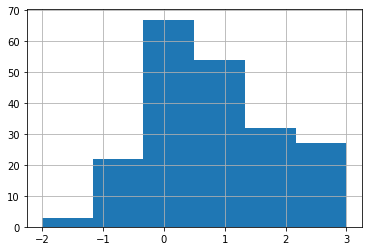

In [65]:
df['symboling'].hist(bins=6)

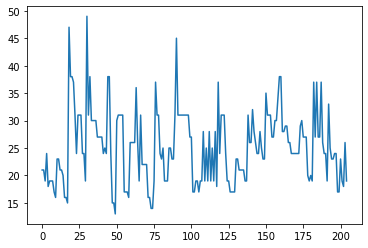

In [83]:
df['city-mpg'].plot()

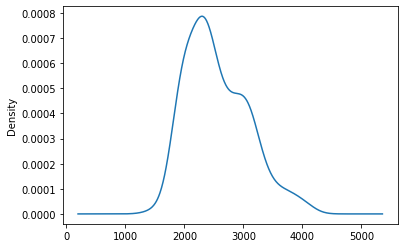

In [40]:
df['curb-weight'].plot.density()

## 5) Create at least one visualization from a crosstab:

Remember that a crosstab is just a dataframe and can be manipulated in the same way by row index, column, index, or column/row/cell position.


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f8acbe39940>,
      dtype=object)

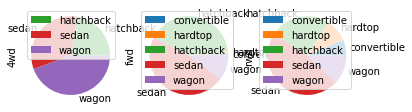

In [99]:
tab = pd.crosstab(df['body-style'],df['drive-wheels'])

tab.plot(kind='pie', subplots=True)

## Stretch Goals 

The following additional study tasks are optional, they are intended to give you an opportunity to stretch yourself beyond the main requirements of the assignment. You can pick and choose from the below, you do not need to complete them in any particular order.

### - Practice Exploring other Datasets

### -  Try using the Seaborn plotting library's "Pairplot" functionality in order to explore all of the possible histograms and scatterplots of your dataset all at once:

[Seaborn Pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html)

### - Turn some of the continuous variables into categorical variables by binning the values using:
- [pd.cut()](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.cut.html)
- [pd.qcut()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html)
- <https://stackoverflow.com/questions/30211923/what-is-the-difference-between-pandas-qcut-and-pandas-cut>

And then use crosstabs to compare/visualize these binned variables against the other variables.


### - Other types and sources of data
Not all data comes in a nice single file - for example, image classification involves handling lots of image files. You still will probably want labels for them, so you may have tabular data in addition to the image blobs - and the images may be reduced in resolution and even fit in a regular csv as a bunch of numbers.

If you're interested in natural language processing and analyzing text, that is another example where, while it can be put in a csv, you may end up loading much larger raw data and generating features that can then be thought of in a more standard tabular fashion.

Overall you will in the course of learning data science deal with loading data in a variety of ways. Another common way to get data is from a database - most modern applications are backed by one or more databases, which you can query to get data to analyze. We'll cover this more in our data engineering unit.

How does data get in the database? Most applications generate logs - text files with lots and lots of records of each use of the application. Databases are often populated based on these files, but in some situations you may directly analyze log files. The usual way to do this is with command line (Unix) tools - command lines are intimidating, so don't expect to learn them all at once, but depending on your interests it can be useful to practice.

One last major source of data is APIs: https://github.com/toddmotto/public-apis

API stands for Application Programming Interface, and while originally meant e.g. the way an application interfaced with the GUI or other aspects of an operating system, now it largely refers to online services that let you query and retrieve data. You can essentially think of most of them as "somebody else's database" - you have (usually limited) access.

*Stretch goal* - research one of the above extended forms of data/data loading. See if you can get a basic example working in a notebook. Image, text, or (public) APIs are probably more tractable - databases are interesting, but there aren't many publicly accessible and they require a great deal of setup.

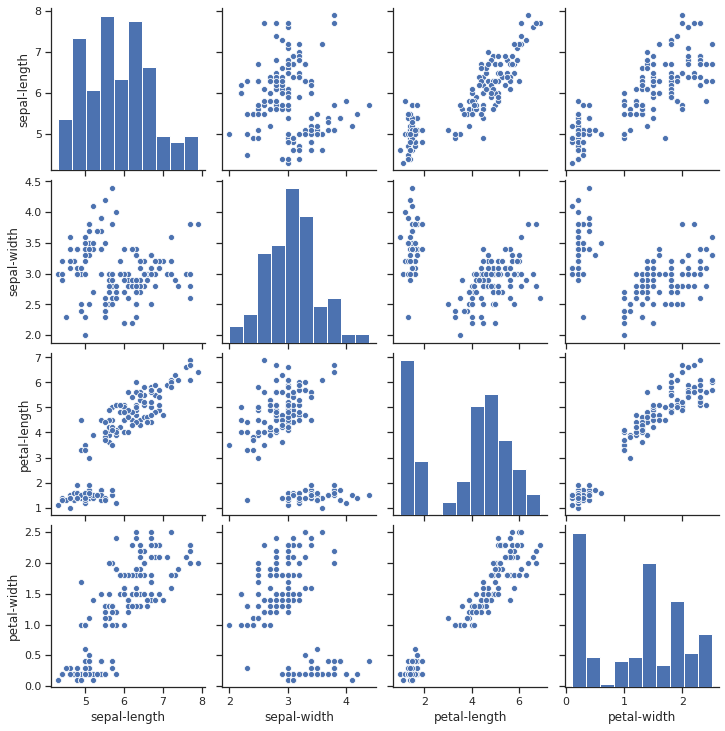

In [102]:
import seaborn as sns; sns.set(style="ticks", color_codes=True)

sns.pairplot(df2)

In [110]:
!curl http://ergast.com/api/f1/2008/

<html>
  <head>
    <title>Error</title>
  </head>
  <body>
    <h3>Bad Request</h3>
  </body>
</html>
